<a href="https://colab.research.google.com/github/cbertolasio/python-study-group/blob/master/MandelbrotSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Mandelbrot Set.

One of the things that really got me interested in math was the Mandelbrot set.  I was a music major in college and taking Calculus.  (Long story.)  On the cover of our text book was a picture of a region of the Mandelbrot set.  One day, after staring at the cover for a while, I decided to do a little digging to see what it was about.  I discovered the incredible beauty and infinite complexity of something that was fairly simple to recreate.  This notebook will guide you through a series of exercises and discussions that end up with some code that can plot the Mandelbrot set, and the closely related Julia sets.  I hope you enjoy the journey.

The Mandelbrot set is named after the mathematician Benoit Mandelbrot.  [There is some controversy](https://www.scientificamerican.com/article/mandelbrot-set-1990-horgan/) about Mandelbrot being the person that actually discovered the set.  Regardless of that, the name has stuck.  The set is fairly popular and is easily recognizable to many computer scientists and mathematicians.

![alt text](https://docs.google.com/uc?export=download&id=1rSTpMcbNQcKzL0Df_pYz-UdxDaiBv4kR)

One really interesting thing about the set is that it is self similar.  In other words, if you "zoom in" on the edge of the set, you start to see little copies of the set imbedded in itself.  Another fascinating thing about the set is that the perimeter of the figure is infinite, but the area contained in the set is finite.

![alt text](https://docs.google.com/uc?export=download&id=1mr-wN2luzCqJGa5aCATXK67k3S7HN5Jl)

The algorithm to construct the set is fairly simple.  Before we do that, however, we will need to refresh our memories on complex numbers.

You will recall from your advanced calculus class (or perhaps another class that you had prior) that the square root of -1 is defined as:

$$ \sqrt{-1}= i $$

Now, imagine a plane where the x axis is the real numbers and the y axis represents real numbers times i.  This is referred to as the complex plane, and is home to the Mandelbrot set.

To render the set, we perform an algorithm for all of the points in the complex plane.  It turns out that the Mandelbrot set is completely contained inside a circle of radius 2 centered on the origin.  For the mathematically inclined, a proof of that [can be found here](https://math.stackexchange.com/questions/961412/show-that-mandelbrot-set-is-contained-within-the-closed-disc-of-r-2).  Scroll down on that page to see the proof by induction.)  A detailed mathematical analysis can also be found on the [Wolfram mathworld site](http://mathworld.wolfram.com/MandelbrotSet.html).

<img src="https://docs.google.com/uc?export=download&id=1aGyWvG17QxlU-3-BgDopuA8gIwb4GHU_" width="400"/>

The algorithm goes like this:

Take a point from the complex plane, and call it C.  The point can be represented as a complex number in the form of a+bi.  Also, call this same point:

$$ Z_0 = C = a+bi $$

Next, compute a new point based on this first point:

$$ Z_{n+1} = Z_n^2 + C $$

Now, expand that sequence.  At some point, we will see one of three things happen:

-  The sequence will converge
-  The sequence will bounce around chaotically.
-  The sequence will tend to infinity, or "blow up".

Create this sequence for every point in a square region of $ -2-2i $ to $ 2+2i $ of the complex plane, and add the original point to the set if the sequence doesn't "blow up" (aka tend to infinity).  The resulting set is the Mandelbrot set.

To render this set in python,  we will need a function that can perform the operation above for complex numbers.  And the first step in that is to be able to compute a new $ Z_{n+1} $ based on a given  $ Z_n $ and $ C $.

*Note:  For our code, we will represent complex numbers as separate real and imaginary components.  Python does have a [complex numbers module called cmath](https://docs.python.org/2/library/cmath.html).  For our purposes, because we will be iterating over a range of real and complex parts, keeping those pieces separate and not trying to use cmath will make things a bit easier for us.*

As an example, lets compute the first step in the sequence by hand.  We will start with an arbitrary point in the complex plane of $ C = 0.5 + 0.5i $

Here is an example, let's start with the point $ Z_0 = C = 0.5 + 0.5i $

$$ 
Z_{n+1} = Z_n^2 + C \\
Z_{n+1} = (0.5 + 0.5i)^2 + (0.5 + 0.5i) \\
Z_{n+1} = (0.5 + 0.5i)(0.5 + 0.5i) + (0.5 + 0.5i) \\
Z_{n+1} = 0.25 + 0.25i + 0.25i + 0.25i^2 + 0.5 + 0.5i \\
Z_{n+1} = 0.5 + i
$$

(Remember that $ i^2 = -1 $)

So...  Your first coding task is to implement the following function that we will use later...

In [0]:
def compute_z(zr, zi, cr , ci):

    #######################
    # PLEASE MAKE A COPY OF THIS NOTEBOOK FIRST!
    # Then put your code here so that this cell passes.
    #######################
    
    return r, i
    

# Make sure this cell runs
r, i = compute_z(0.5, 0.5, 0.5, 0.5)

assert(r==0.5)
assert(i==1)
print("Passed")

Passed


Now that we have figured out how to compute $ Z_{n+1} $ from a given $ Z_n $ , we need to implement another function that can compute the sequence for a given point for a number of steps.  We will refer to this concept as computing the <b>orbit</b> of the point.  In the next cell, we want to continue to compute Zr and Zi for subsequent steps.  


It is important that we "bail out" if the distance between our point from the origin is greater than 4.  (Remember that if we get outside of a circle of radius of 2, we won't be in the set anyway.)  This is important because the further away from the origin we are, the faster we will tend to infinity.  It is easy to generate out of range errors if we don't have an "emergency stop" built into our code.

In the next cell, complete the function so that it returns a tuple.  This tupple will be the real and imaginary parts of the orbit of the specified point (r,i) after a given number of steps.  Remember, if the distance from the origin to the orbit sequence is greater than 4, stop and return the value of the orbit at that point.

There are tests below to help ensure that you are doing things correctly.


In [0]:
import math

def orbit(r, i, steps):

    # Your code here.
    
    return zr, zi

o1r, o2r = orbit(0.5,0.5,10)
assert(o1r==9.486587524414062)
assert(o2r==9.328857421875)

o1r, o2r = orbit(-1.5,0.0001,10)
assert(o1r==-1.4941359407289188)
assert(o2r==0.0007619351623931308)

o1r, o2r = orbit(-0.75,-0.3,10)
assert(o1r==2.5770435969316328)
assert(o2r==0.9798228008132972)

print("Passed.")

NameError: ignored

We now have almost all the pieces we need to draw our first version of the mandelbrot set.  Now we just need to iterate over the range of -2 to 2 on the real axis, and -2 to 2 on the imaginary axis.  As we do so, we will see if the orbit after 50 steps falls within 2 units of the origin.  If so, we will consider the point to be in the Mandelbrot set.

Here is some pseudo code and actual code to draw the Mandelbrot set.  You will get a chance to do a more detailed version in a moment!

1. Have an outside loop that goes from -2 to 2.  This will be the real component of the seed point for the orbit.  Checkout numpy's arange function to do this.

2.  Have an inside loop that goes from -2 to 2.  This will be the imaginary component of the seep point for the orbit.

3.  Call the orbit funciton above.

4.  Check if the distance of the returned value of orbit is greater than 2.  
hint:  compute this distance like this:  $ d = \sqrt{r^2+i^2} $

5.  If the distance is less than 2, use mathplotlib to plot the point...

<pre>
from mathplotlib import pyplot as plt
...

plt.scatter(r,i, c='b', marker='.')

...

plt.show()  #<- only do this ONCE outside your loops!

</pre>

The following code shows how this can be implemented in python...

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import math


for r in np.arange(-2, 2, 0.05):
    for i in np.arange(-2, 2, 0.05):
        mr, mi = orbit(r, i, 50)
        if (math.sqrt(mr**2 + mi**2) < 2.0):
            plt.scatter(r,i, c='b', marker='.')
            
plt.show()
        

## That is cool, but what is with the colors.

The above image shows the mandelbrot set, and is done by taking points in the complex plane and computing the orbits of those points to determine if the points lie within the set.  Many images, however, show the Mandelbrot set with a dazling array of colors.  Those images are typically generated by taking into account the distance from either the origin, or the seed point when drawing the set.  Then, colors are assigned based on that distance. 

In the following cell, an array, M, has been created.  The first two components of the array correspond to the INDEX of some real and imaginary numbers.  Now, what does that mean?  Well, consider a region of the complex plane that runs from -2.0 to 2.0 on the real (x) axis, and -2.0 to 2.0 on the imaginary (y) axis.  Now, cut that square up so that it has 400 slots across, and 400 slots vertically. While the slots represent some value between -2 and 2, we can simply enumerate them from 0 to 400.  It turns out there is a very helpful numpy function for this called linspace.

The last axis of the array holds the color of the point.  This is represented by a 3-tuple, with the value of each component between 0 and 255.  These three numbers will correspond to the red, blue, and green value associated with the pixel when the array is rendered.

Here is an example.  The point in the center of our 2x2 square is the origin.  Because we have divided our square into 400x400 units (another way to think of this is we want to end up with a 400x400 pixel image), the point in the center has the index value of 200,200.  Since the 200th row and 200th column corresponds to 0 on the real axis and 0 on the imaginary axis, we would compute the orbit for a point $ C = 0 + 0i $.  That just means we call our orbit function like this:

s = orbit(0,0,steps)  Where steps is some number like 50.  The orbit will end up still being $ Z_{50} = 0 + 0i $ and so we store zeros:

```python
M[200,200] = 0,0,0
```
Now...  we obviously want to use variables, and not specified values like shown above.  The point here is to illustrate how this should work.

Up to now, I have used orbits of length 50.  Since we are doing these calculations for every point in the complex plane, the larger the orbit value, the longer it will take to render the set.  An orbit length of 15 is usually sufficient to get a very detailed view of the Mandelbrot set.

## Making it pretty...

The three number tuple should be a function of the distance from zero to the orbit at some arbitrary step.  (See the orbit function above.)

There are any number of ways to do this.  Here is one way.  Hint...  the code below falls inside "range" loops.

 ``` python
 M = np.zeros((r_res,i_res,3),dtype=np.uint8)
 s = math.sqrt((orbit_r**2)+(orbit_i**2))
 M[imaginary,real]=s,s,255-s
 ```
 
 ... where orbit_r and orbit_i are values returned by the orbit function.
 
 I encourage you to be creative, and come up with some algorithm that is visually pleasing to you.
 
Once you are done, the draw_mandelbrot function can be used to explore the mandelbrot set.  Two example regions are included below.

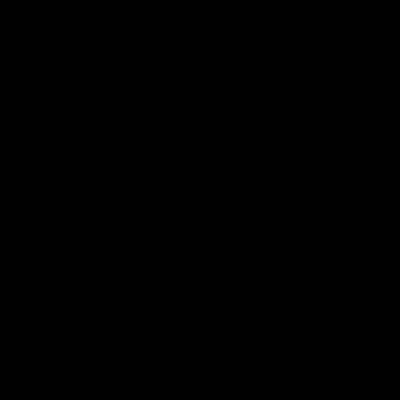

Done


In [0]:
%matplotlib inline
import numpy as np
from PIL import Image


def draw_mandelbrot(r_min, r_max, i_min, i_max, r_res, i_res):
    
    R = np.linspace(r_min, r_max, num=r_res)
    I = np.linspace(i_min, i_max, num=i_res)
    
    M = np.zeros((r_res,i_res,3),dtype=np.uint8)
    
    # Write code here to iterate over the R and I lists above.
    # Assign values in the M matrix based on the the
    # values in R and I.  (You will need 2 loops to do this.)
        
    #  This code will convert the M array to an image using the Python Image
    #  Library (or PIL).  It will then use the display feature of jupyter
    #  notebooks to display the image.
    img = Image.fromarray(M)
    display(img)
    print("Done")
    
draw_mandelbrot(-2.0,0.5,-1.5,1.5,400,400)

Your answer should look like this:

![alt text](https://docs.google.com/uc?export=download&id=1NaGQ016agkBUbs1wwP2VEgCHOfn0mQPL)


In [0]:
# Run this cell to see a zoomed-in view of the edge of the mandelbrot set...

draw_mandelbrot(0.0,0.5,0.0,0.5,1000,1000)

NameError: ignored

## Part 2.  Julia Sets

Julia sets are another class of interesting geometric objects from the same general family of the Mandelbrot set.  To construct a Julia set, you use the same basic algorithm used to create the Mandelbrot set, except rather than using a seed point (C) that corresponds to each new $ Z_0 $, you simply fix C to be some point in the complex plane.  Note, for a single julia set, you fix C to some given value on the complex plane.  This value does not vary every time you compute the orbit for a new point.  

Your task here is to construct two new function called julia_orbit.  The function will compute the "julia orbit" for a given number of steps.  A starter function has been created below with some tests to make sure that things are working correctly.  Note, you should be able to reuse the compute_z function you created above.

In [0]:
def julia_orbit(r, i, jr, ji, steps):

    # Your code here.  This time fix the value of "C" to be (jr,ji). 

    return zr, zi

zr, zi = julia_orbit(0.3, 0.24, 0.3, 0.2, 15)
assert(zr==0.22107316611581113)
assert(zi==0.3694650476180637)
print("Passed!")

## Drawing a julia set.

Finally, complete the cell below that draws the julia set for a given point.  Below, I have chosen the point $ C = 0.3+0.42i $ as the seed point.  Feel free to change this as you like.

Remember, the algorithm for drawing a Julia set is very similar to drawing the Mandelbrot set.  The exception is that for a Julia set, we pick some arbitrary $ C $ value, and don't change it as we compute the orbits of points in the complex plane.



In [0]:
def draw_julia(jr, ji, r_min, r_max, i_min, i_max, r_res, i_res):
    
    R = np.linspace(r_min, r_max, num=r_res)
    I = np.linspace(i_min, i_max, num=i_res)
    
    M = np.zeros((r_res,i_res,3),dtype=np.uint8)

    # Your code here.  It will be similar to draw_mandelbrot, but must include
    # reference to the new "fixed" values of (jr,ji) that are passed into this
    # function.

    img = Image.fromarray(M)
    display(img)
    print("Done")
    
draw_julia(0.3, 0.42, -2.0, 2.0, -1.5, 1.5, 400, 400)

Your answer should look like this:

![alt text](https://docs.google.com/uc?export=download&id=1HOFaEWoEgko3o_6YLvJHGMVBirsSvS_G)


## Can you answer this question.

Based on the code above, explore different Julia sets with various seed values in the complex plane.

What can you say about the shape of julia sets when the seed point is inside vs. outside the Mandelbrot set?

# Conclusion:
I hope you have enjoyed this exploration of Mandelbrot and Juilia sets, and have had the chance to write a little python code in the process. The code and examples that we have worked with here are very "math heavy". I don't want to give you the impression that is all you can do with Python. So, next time, we will take a look at a very useful library tool called "beautiful soup" that can be used to parse the content of HTML or XML files.

So, until next time, I will leave you with a little teaser.

    Beautiful Soup, so rich and green, 
    Waiting in a hot tureen! 
    Who for such dainties would not stoop? 
    Soup of the evening, beautiful Soup!
Your homework is to figure out where this comes from!